In [9]:
import pandas as pd
import matplotlib.pyplot as py
import numpy as np
import seaborn as sns

In [12]:
df=pd.read_csv("titanic.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [16]:
#counting num of passengers
df['PassengerId'].nunique()

891

In [15]:

#countign number of male and female
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\S\AppData\Local\Temp\ipykernel_7652\3360400228.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


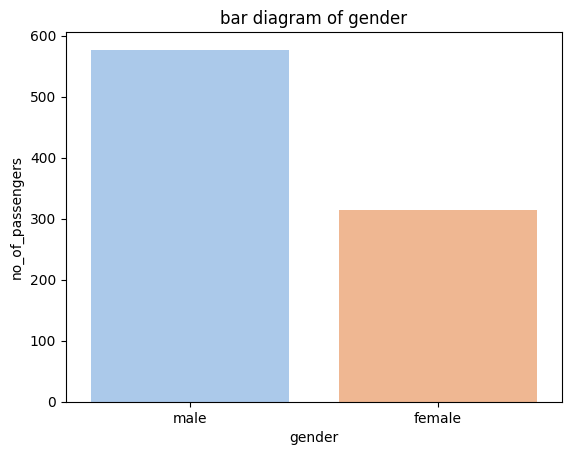

In [17]:
sns.countplot(x='Sex', data=df, palette='pastel')
py.title('bar diagram of gender')
py.xlabel('gender')
py.ylabel('no_of_passengers')
py.show()

In [18]:
#measure of central tendency on age
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
median_Age=df['Age'].median()
mode_Age=df['Age'].mode()[0]

print(f"median age is {median_Age}")
print(f"modal age is {mode_Age}")

median age is 28.0
modal age is 24.0


->average age of passenger is 30.27,
->median age is 27 which means half of passengers were younger
than 27 yrs old and then other half older than 27
->modal age is 21 which means most repeated age is 21 yrs old.

Text(0, 0.5, 'passenger')

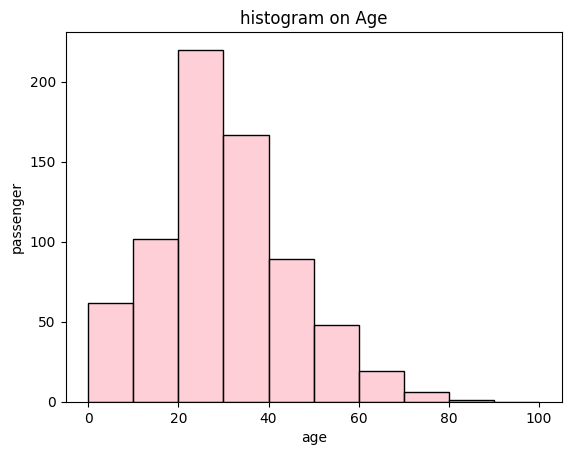

In [20]:
bins = np.arange(0, 101, 10)
sns.histplot(df['Age'],bins=bins,color='pink')
py.title('histogram on Age')
py.xlabel('age')
py.ylabel('passenger')

In [21]:
#calculating no of passengers in pclas
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

C:\Users\S\AppData\Local\Temp\ipykernel_7652\1108977899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='pastel')


Text(0, 0.5, 'no of passengers')

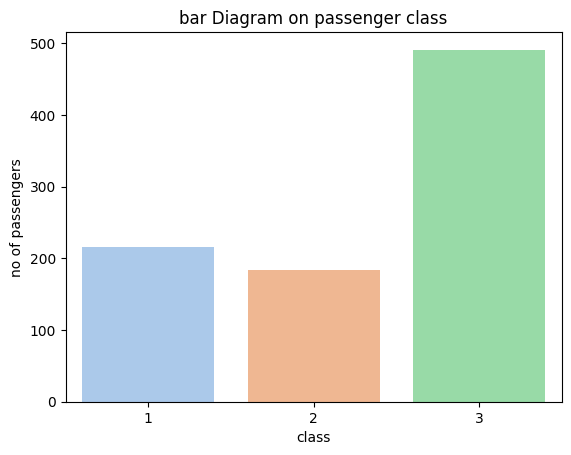

In [22]:

sns.countplot(x='Pclass', data=df, palette='pastel')
py.title('bar Diagram on passenger class')
py.xlabel('class')
py.ylabel('no of passengers')

claculate avg fare

In [24]:
df['Fare'].describe()



count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0, 0.5, 'no of passengers')

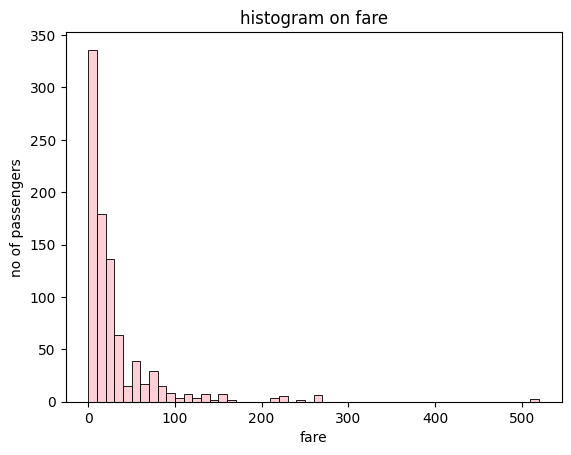

In [25]:
bins = np.arange(0, df['Fare'].max() + 10, 10)
sns.histplot(df['Fare'],bins=bins,color='pink')

py.title('histogram on fare')
py.xlabel('fare')
py.ylabel('no of passengers')

In [26]:
#counting no of people in embarked class
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
df['Embarked'].describe(include=['object'])

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Text(0, 0.5, 'no of passengers')

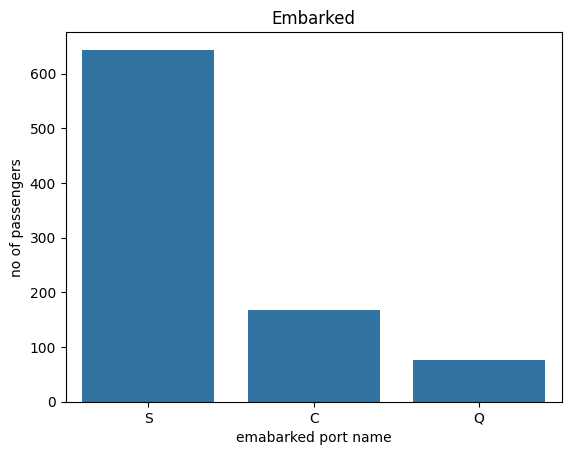

In [28]:
sns.countplot(x='Embarked',data=df)
py.title('Embarked')
py.xlabel('emabarked port name')
py.ylabel('no of passengers')

in conclusion there are 418 passengers(266 male,152 female),average age was 30.27.there were 3 classes:in 3rd class(218 people),2nd class(93 people),in 1st class(107 people).Average fare was 35 and maximum fare was 512.39.270 people departed from southhampton port,102 from Cherbourg and 46 from queenstown.

SURVIVED VS  NUMERICAL COLUMNS

BIVARIATE ANALYSIS .OUR TARGET IS SURVIVED  SO TARGET VS OTHER FEATURES

In [39]:
#data cleaning
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [42]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


Text(0.5, 1.0, 'Survival vs Sex')

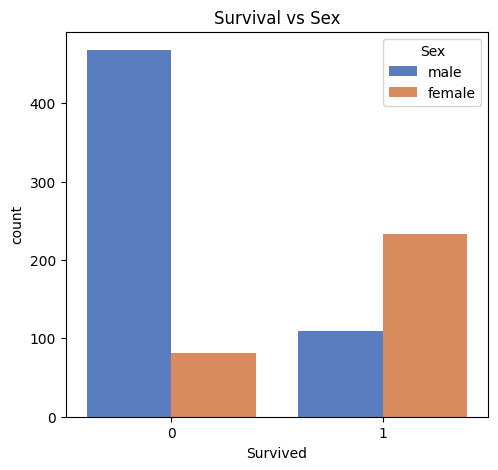

In [43]:
py.figure(figsize=(12, 5))
py.subplot(1, 2, 1)
sns.countplot(x='Survived', hue='Sex', data=df, palette='muted')
py.title('Survival vs Sex')

here we can see that 0 means dead and then 1 means survived so in 0 class no of male is higher so male gender had higher death rate and then female had higher survival rate

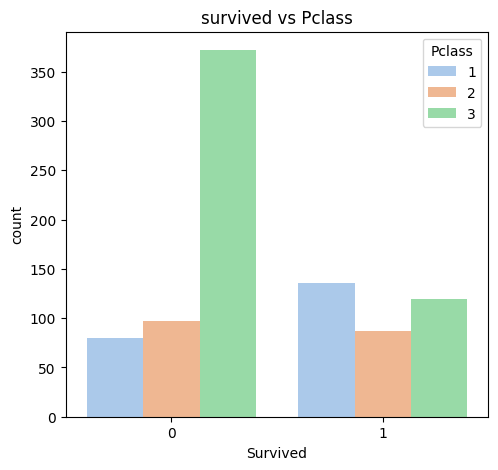

In [44]:
py.figure(figsize=(12,5))
py.subplot(1, 2, 1)
sns.countplot(x='Survived', hue='Pclass',data=df, palette='pastel')
py.title('survived vs Pclass')
py.show()

we cans ee that highest death rate is in 3rd class while highest survival rate is in 1st class as it slightly more than 3rd class.

Text(0.5, 1.0, 'Survived vs Age')

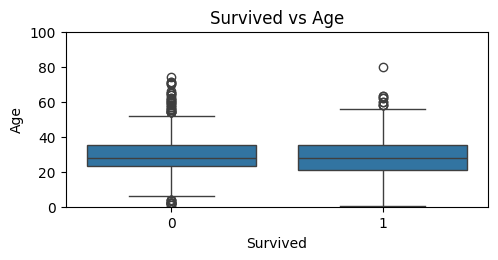

In [51]:
# Age (Continuous)
py.figure(figsize=(12,5))
py.subplot(2, 2, 1)
sns.boxplot(data=df, x='Survived', y='Age')
py.ylim(0, 100)
py.title('Survived vs Age')

Text(0.5, 1.0, 'Survived vs Fare')

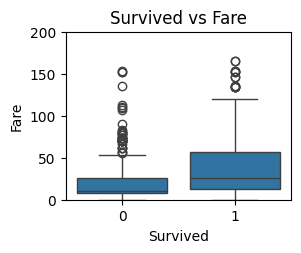

In [48]:
# Fare (Continuous)
py.subplot(2, 2, 2)
sns.boxplot(data=df, x='Survived', y='Fare')
py.ylim(0, 200)
py.title('Survived vs Fare')

Age

    Highest Survival: Children (0–10).

    Highest Death: Young adults (20–35).

Fare

    Highest Survival: Passengers paying >50.

    Highest Death: Passengers paying <25.

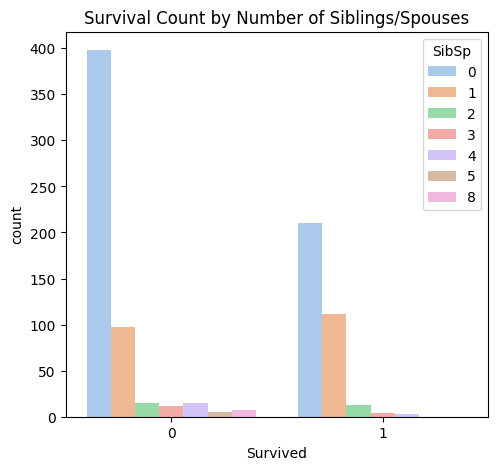

In [56]:
py.figure(figsize=(12,5))
py.subplot(1, 2, 1)
sns.countplot(x='Survived', hue='SibSp',data=df, palette='pastel')
py.title('Survival Count by Number of Siblings/Spouses')
py.show()

1. Survived vs. SibSp (Siblings/Spouses)
Passengers traveling with one sibling or spouse had the highest survival rate, while those with many family members (5+) or those traveling alone had lower survival rates.

2. Survived vs. Parch (Parents/Children)
 Survival was highest for passengers in small families (1-3 members), whereas those traveling in large groups or completely alone were less likely to survive

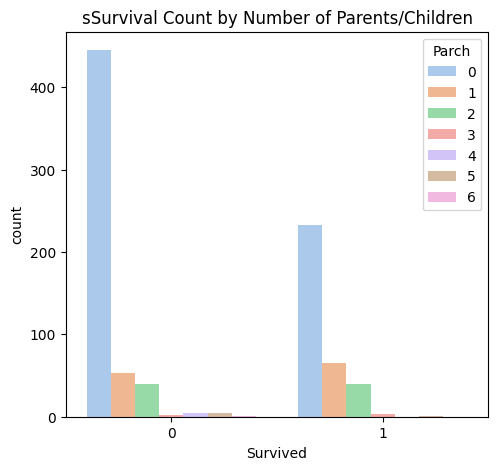

In [54]:
py.figure(figsize=(12,5))
py.subplot(1, 2, 1)
sns.countplot(x='Survived', hue='Parch',data=df, palette='pastel')
py.title('sSurvival Count by Number of Parents/Children')
py.show()

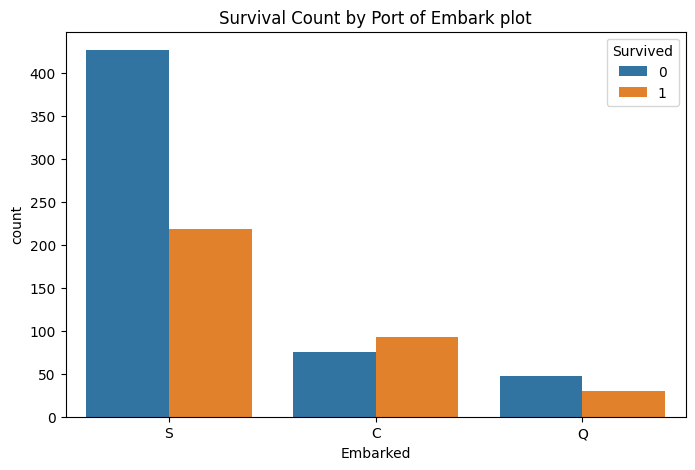

In [57]:
py.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
py.title('Survival Count by Port of Embark plot')
py.show()

In [58]:
#ENCODING
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encode 'Sex' (Transforms to 0 and 1)
df['Sex'] = le.fit_transform(df['Sex'])
# Encode 'Embarked' (Transforms to 0, 1, and 2)
df['Embarked'] = le.fit_transform(df['Embarked'])
# Preview the changes
print(df[['Sex', 'Embarked']].head())

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


MULTIVARAITE ANALYSIS

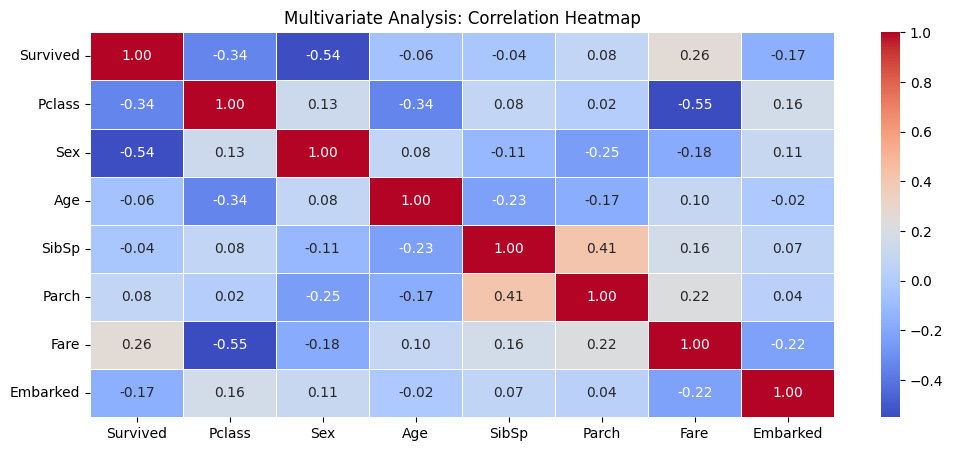

In [59]:
py.figure(figsize=(12, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
py.title('Multivariate Analysis: Correlation Heatmap')
py.show()

Scaling age and fare as fare has much larger range than age and sclaing so that system doesnot think more importance tof are due to
its higher range.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df[['Age', 'Fare']].head())

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337
